# Practice Session 09: Viral Propagation
<font size="+2" color="blue">Additional results: targeted immunization</font>

# 1. The SFHH Conference Dataset

In [ ]:
import io
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
INPUT_FILENAME = "sfhh-conference-2009.csv"

In [ ]:
# LEAVE AS-IS

# Create a new undirected graph
g = nx.Graph()

with io.open(INPUT_FILENAME) as input_file:
    # Create a CSV reader for a comma-delimited file with a header
    reader = csv.DictReader(input_file, delimiter=',')

    # Iterate through records, each record is a dictionary
    for record in reader:

        # Add one edge per record
        g.add_edge(record['Source'], record['Target'])

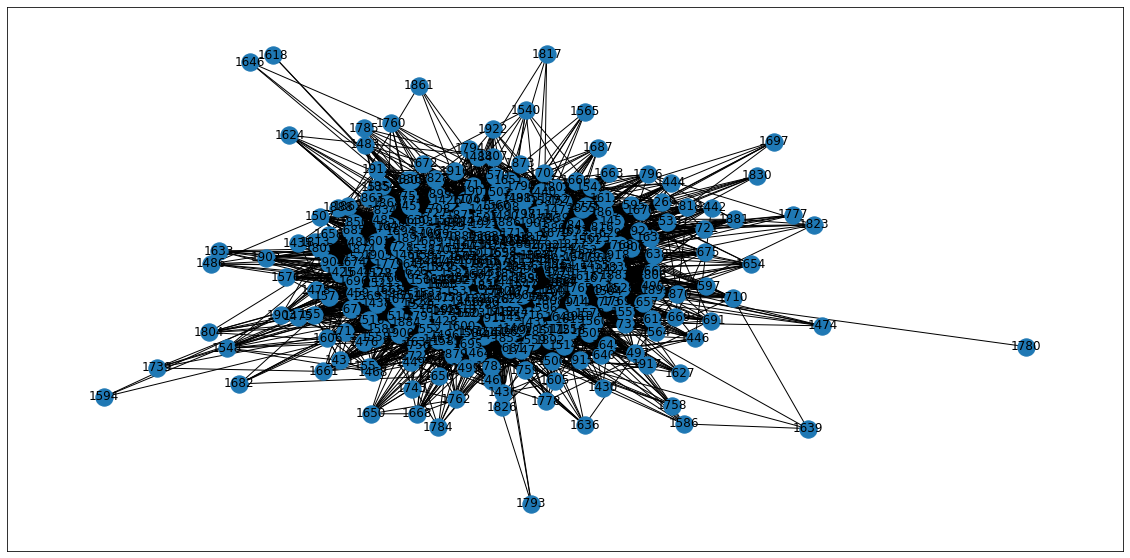

In [ ]:
# LEAVE AS-IS

# Create an empty figure; feel free to change size to accommodate to your screen
plt.figure(figsize=(20,10))

# Draw the graph
nx.draw_networkx(g)

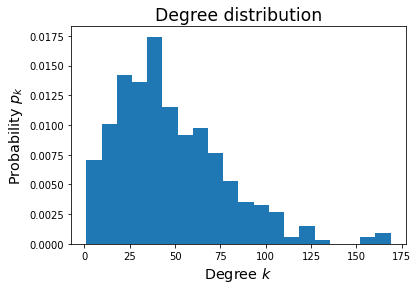

Degree: 47.5 +/- 30.1, range [1, 169]


In [ ]:
# LEAVE AS-IS

def plot_degree_dist(graph):

    # Obtain the sequence of degree of nodes
    # Function graph.degree() return tuples (node,degree)
    degrees = [degree_tuple[1] for degree_tuple in graph.degree()]

    # Draw the histogram of the degree
    plt.hist(degrees, density=True, bins=20)
    plt.title("Degree distribution", fontdict={'fontsize': 'xx-large'})
    plt.xlabel("Degree $k$", fontdict={'fontsize': 'x-large'})
    plt.ylabel("Probability $p_k$", fontdict={'fontsize': 'x-large'})
    plt.show()

    # Print some degree statistics
    print("Degree: {:.1f} +/- {:.1f}, range [{:d}, {:d}]".format(
        np.mean(degrees), np.std(degrees), np.min(degrees), np.max(degrees)))

plot_degree_dist(g)

In [ ]:
import statistics

# Is this a scale-free network?
print("Proving if this is a scale-free network...")

N = len(g.nodes())
node_degrees = [] # Lista con los grados de los nodos para calcular las estadísticas

for node in g.nodes():
  node_degree = g.degree(node)
  node_degrees.append(node_degree) # Se añade el grado de cada nodo del grado

print(("Standard deviation: %.3f")%(statistics.stdev(node_degrees)))
print(("Avg degree: %.3f")%(statistics.mean(node_degrees)))


# Random Network STD:

# Std = <k>^1/2 = Sqrt(<k>)


Std_RN = np.sqrt(statistics.mean(node_degrees))

print(("Standard Deviation if this is a Random network, Std = <k>^1/2 = Sqrt(<k>): %.3f")%(Std_RN))
print(("Statistics computed standard deviation: %.3f")%(statistics.stdev(node_degrees)))

# Scale free network STD:

# Std = Sqrt(Var)
# Var = <k^2> - <k>^2

# Se crea una nueva lista para calcular <k^2>
node_degrees2 = [] # Lista con los grados de los nodos paa calcular las estadísticas

for node in g.nodes():
  node_degree2 = pow(g.degree(node),2) # Se calcula el cuadrado del grado del nodo
  node_degrees2.append(node_degree2)

avg_degree2 = statistics.mean(node_degrees2) # Media de los grados al cuadrado <k^2>
degree2 = pow(statistics.mean(node_degrees),2) # Cuadrado de la media de los grados <k>^2
scale_free_variance = avg_degree2 - degree2 # La variancia en las redes scale-free es Var = <k^2> - <k>^2
Std_SF = pow(scale_free_variance,1/2) # Std es la raiz cuadrada de la variancia

print(("Avg (degree^2): %.3f")%(avg_degree2))
print(("Standard Deviation if this is a Scale Free network, Std = Sqrt(<k^2> - <k>^2): %.3f")%(Std_SF))
print(("Statistics computed standard deviation: %.3f")%(statistics.stdev(node_degrees)))

Proving if this is a scale-free network...
Standard deviation: 30.181
Avg degree: 47.469
Standard Deviation if this is a Random network, Std = <k>^1/2 = Sqrt(<k>): 6.890
Statistics computed standard deviation: 30.181
Avg (degree^2): 3161.931
Standard Deviation if this is a Scale Free network, Std = Sqrt(<k^2> - <k>^2): 30.143
Statistics computed standard deviation: 30.181


En el código anterior, se verifica como la desviación típica es de una red libre de escalas y no las de una red aleatoria. Por lo tanto la red en cuestión es una red libre de escalas. Que se caracteriza por una distribución de los grados de los nodos menos concentrada, es decir, cuya desviación típica, previamente calculada, es muy superior a la de una red aleatoria. Esto se debe a que las redes aleatorias no contemplan la posibilidad de que haya nodos que tengan un grado muy superior al resto o muy inferior. Como se puede ver en el gráfico de la distribución, esto sí que pasa ya que a pesar de tener grado medio 47'5 hay nodos de grados cercanos a 1 y nodos con grado cercano a 170.

# 2. Independent cascade model

In [ ]:
def infect_recursive(graph, starting_node, beta, infected):
  infected[starting_node] = True # Se establece como infectado
  for neighbor in graph.neighbors(starting_node): # Se itera para ver si infecta a cada vecino
    if infected[neighbor] != True: # Si el vecino no está infectado
      if random.uniform(0,1) <= beta: # Calculo de probabilidad para ver si se infecta
        infect_recursive(graph, neighbor, beta, infected) # Pasa a ser el nodo inicial y se repite recursivamente


def simulate_independent_cascade(graph, starting_node, beta):
    infected = dict([(node, False) for node in graph.nodes()])
    infect_recursive(graph, starting_node, beta, infected)
    return infected


In [ ]:
def simulate_multiple_independent_cascades(graph, beta, repetitions):
  N = len(graph.nodes())
  infect_avg = 0
  for i in range(repetitions):
    rd_node = random.choice(list(graph.nodes())) # Se escoge un nodo al azar
    infected = simulate_independent_cascade(graph, rd_node, beta) # Se hace una simulación
    infect_avg += sum(infected.values())/(repetitions*N) # Se suma la fracción de infectados (NºTrue/N) dividida entre el número de repeticiones ( NºTrue/(N*repetitions))
  return infect_avg


In [ ]:
# LEAVE AS-IS

REPETITIONS = 100
for beta in [0.01, 0.1, 0.2, 0.9, 1.0]:
    print("Beta={:.2f}; Fraction of infected={:.6f} (average of {:d} runs)".format(
        beta,
        simulate_multiple_independent_cascades(g, beta, REPETITIONS),
        REPETITIONS
    ))



Beta=0.01; Fraction of infected=0.006129 (average of 100 runs)
Beta=0.10; Fraction of infected=0.858536 (average of 100 runs)
Beta=0.20; Fraction of infected=0.936253 (average of 100 runs)
Beta=0.90; Fraction of infected=0.999727 (average of 100 runs)
Beta=1.00; Fraction of infected=1.000000 (average of 100 runs)


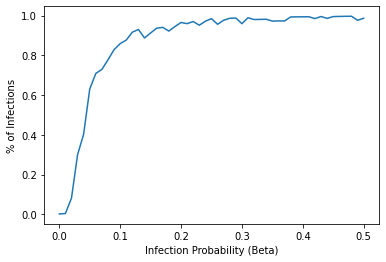

In [ ]:
REPETITIONS = 100
x_values = np.arange(0,0.51,0.01) # Valores de Beta
y_values = []

for beta in x_values:
  y_values.append(simulate_multiple_independent_cascades(g, beta, REPETITIONS)) # Devuelve la fracción de infectados para cada beta

plt.plot(x_values, y_values)

plt.xlabel("Infection Probability (Beta)")
plt.ylabel("% of Infections")
plt.show()

Como se puede observar en la gráfica, el crecimiento de las infecciones con la probabilidad de transmisión es extremadamente acelerado al inicio, pero rápidamente va frenando, tanto es así, que para betas superiores a 0'15 aproximadamente, la infección es prácticamente del 100%, esto se debe en gran medida al grafo, cuyo grado medio está alrededor de 48, eso significa que aunque la probabilidad de infección sea muy baja, el número de contactos entre infectados y susceptibles es enorme, lo que favorece ampliamente la tasa de propagación de la infección que viene dada precisamente por el número de interacciones de cada infectado con gente susceptible y por la probabilidad de infección, en este caso, Ro = k·Beta, siendo, k el average degree, 47'5, y Beta 0'15, obtenemos una tasa de propagación de 7'125, algo extremadamente alto, ya que se estima que cada infectado contagie a otros 7 siendo superior a la Difteria, cuyo Ro es de 6-7.

# 3. Reduce maximum degree

In [ ]:
def graph_max_degree(graph, max_degree):
  g_max = nx.Graph() # Se crea un nuevo grafo vacío
  for node in graph.nodes(): # Se le añaden todos los nodos del que copia
    g_max.add_node(node)
  shuffled_edges = np.random.permutation(graph.edges()) # Se desordenan los ejes para que se seleccionen al azar
  for u,v in shuffled_edges:
    if g_max.degree(u) < max_degree and g_max.degree(v) < max_degree: # Se añade uno de los ejes al azar a no ser que uno de los dos ejes llegue al grado máximo
      g_max.add_edge(u,v)
  return g_max



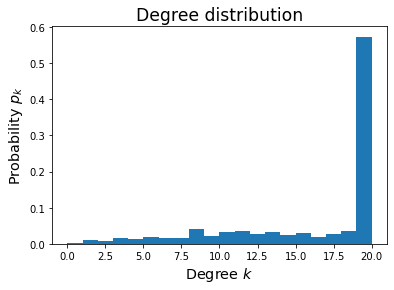

Degree: 16.0 +/- 5.5, range [0, 20]


In [ ]:
# LEAVE AS-IS

# Reduce the max degree of the graph
gmax = graph_max_degree(g, 20)

# If you notice nodes with degree larger than specified,
# it means your graph_max_degree function is deffective.
plot_degree_dist(gmax)

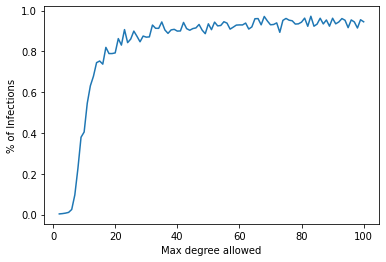

In [ ]:
REPETITIONS = 100
x_values = np.arange(2,101,1) # Grados máximos permitidos
y_values = []

for max_degree in x_values:
  g_max = graph_max_degree(g, max_degree) # Devuelve un grafo del grado máximo especificado
  y_values.append(simulate_multiple_independent_cascades(g_max, 0.2, REPETITIONS))

plt.plot(x_values, y_values)

plt.xlabel("Max degree allowed")
plt.ylabel("% of Infections")
plt.show()

Este gráfico tiene un comportamiento muy similar al anterior, y en cierto modo tiene su lógica, aquí, la beta está fijada en 0'2, y como se puede observar, a partir de los 35 aproximadamente, llega a prácticamente al 100% de las infecciones, es decir, cuando el grado máximo de los nodos está limitado a 35, teniendo en cuenta que el proceso de construcción de este grafo de grado máximo es mediante añadir enlaces a los nodos hasta alcanzar dicho grado máximo, diferente sería si se eliminasen los nodos de grado mayor al máximo, pero no es el caso. La cuestión es que al construir el nuevo grafo de esta manera, la distribución de grado no varía tanto, encontrándose en 35, el mayor número de nodos, a pesar de que su media sea 25, para el caso de max_degree = 35. Esto lo que nos permite ver, que cuando la mayoría de nodos tienen grado 35, y una media de 25, es decir que la tasa de transmisión se encuentra entre Ro = 25·0'2 = 5 y Ro = 35·0'2 = 7, una tasa muy similar a cuando en el otro grafo alcanzaba el 100% de infectados. Por lo que se puede suponer que hay una relación entre grado máximo del grafo y la beta, ya que ambos son parámetros de la misma fórmula, y ya sea que sube uno, como que sube el otro, la tasa subirá por lo que las infecciones lo harán con ella. Para asegurarnos que menos de la mitad se infecten, el máximo grado, es decir, el máximo número de interacciones entre nodos debería estar limitado a menos de 10, no se aprecia mucho pero diria que unas 7 u 8. Por lo ya mencionado antes, al estar directamente relacionados, a pesar de que al llegar al 20% de posibilidad de infección, en el anterior gráfico ya alcanzaba con creces el 100% de infecciones, aquí, en cambio, al modificar el segundo parámetro del que es dependiente la tasa de propagación, vuelve a repetirse el mismo comportamiento, ya que en vez de alterar la posibilidad de infección, alteramos la cantidad máxima de interacciones permitidas, y como la tasa de propagación es proporcional a ambas, tienen un comportamiento similar.

# 4. Random vs friendship paradox immunization

In [ ]:
def give_immunity_random(graph, fraction):
  immunity = dict([(node, False) for node in graph.nodes()])
  while fraction*len(graph.nodes()) > sum(immunity.values()): # Se siguen inmunizando nodos hasta que se alcance la fracción de inmunizados
    node = np.random.choice(graph.nodes) # Se escoge un nodo al azar
    if immunity[node] != True: # Se verifica que el nodo no se haya inmunizado préviamente
      immunity[node] = True # Se inmuniza

  return immunity

In [ ]:
# LEAVE AS-IS

def test_immunize(graph, method, values):
    for fraction in values:
        immunity = method(g, fraction)
        number_immunized = sum(immunity.values())
        number_not_immunized = len(immunity) - number_immunized
        fraction_immunized = number_immunized / (number_immunized + number_not_immunized)
        print("Immunized {:.1f}% of nodes; got a dictionary with {:d} 'True' and {:d} 'False' values ({:.1f}% 'True')".format(
            fraction*100,
            number_immunized,
            number_not_immunized,
            fraction_immunized*100
        ))

test_immunize(g, give_immunity_random, [0.1, 0.3, 0.7])

Immunized 10.0% of nodes; got a dictionary with 41 'True' and 362 'False' values (10.2% 'True')
Immunized 30.0% of nodes; got a dictionary with 121 'True' and 282 'False' values (30.0% 'True')
Immunized 70.0% of nodes; got a dictionary with 283 'True' and 120 'False' values (70.2% 'True')


In [ ]:
def give_immunity_random_friend(graph, fraction):
  immunity = dict([(node, False) for node in graph.nodes()])
  while fraction*len(graph.nodes()) > sum(immunity.values()): # Se siguen inmunizando nodos hasta que se alcance la fracción de inmunizados
    node = np.random.choice(graph.nodes) # Se escoge un nodo al azar
    neighbor = np.random.choice(list(graph.neighbors(node))) # Se escoge un vecino al azar
    if immunity[neighbor] != True: # Se verifica que el vecino no se haya inmunizado préviamente
      immunity[neighbor] = True # Se inmuniza

  return immunity

In [ ]:
# LEAVE AS-IS

test_immunize(g, give_immunity_random_friend, [0.1, 0.3, 0.7])

Immunized 10.0% of nodes; got a dictionary with 41 'True' and 362 'False' values (10.2% 'True')
Immunized 30.0% of nodes; got a dictionary with 121 'True' and 282 'False' values (30.0% 'True')
Immunized 70.0% of nodes; got a dictionary with 283 'True' and 120 'False' values (70.2% 'True')


In [ ]:
def infect_recursive_immune(graph, starting_node, beta, infected, immunity):
  if immunity[starting_node] != True: # Se comprueba si el nodo en cuestión no está inmunizado
    infected[starting_node] = True # Se infecta
    for neighbor in graph.neighbors(starting_node): # Se itera para ver si infecta a cada vecino
      if infected[neighbor] != True: # Si el vecino no está infectado
        if random.uniform(0,1) <= beta: # Calculo de probabilidad para ver si se infecta
          infect_recursive_immune(graph, neighbor, beta, infected,immunity) # Pasa a ser el nodo inicial y se repite recursivamente

def simulate_independent_cascade_immune(graph, starting_node, beta, immunity):
    infected = dict([(node, False) for node in graph.nodes()])
    infect_recursive_immune(graph, starting_node, beta, infected,immunity)
    return infected

In [ ]:
def simulate_multiple_independent_cascades_immunity(graph, beta, repetitions, method, fraction_of_immunity):
  N = len(graph.nodes())
  infect_avg = 0
  immunity = method(graph,fraction_of_immunity) # Se inmunizan los nodos
  immunity_avg = sum(immunity.values())/N # Fracción de nodos immunizados
  for i in range(repetitions):
    rd_node = random.choice(list(graph.nodes())) # Se escoge un nodo al azar
    infected = simulate_independent_cascade_immune(graph, rd_node, beta,immunity) # Se simula la infección
    infect_avg += sum(infected.values())/(repetitions*N) # Cálculo del número medio de infectados en las repeticiones

  return infect_avg,immunity_avg

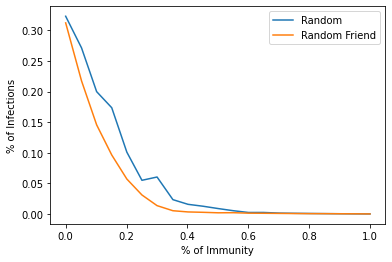

In [ ]:
REPETITIONS = 500
beta = 0.03
fraction_values = np.arange(0,1.05,0.05) # Fracción de inmunizados
x_values = [] # % Inmunes Random
y_values = [] # % Infectados Random
x_values_friends = [] # % Inmunes Random Friend
y_values_friends = [] # % Infectados Random Friend

for fraction in fraction_values:
  infect_avg,immunity_avg = simulate_multiple_independent_cascades_immunity(g, beta, REPETITIONS, give_immunity_random, fraction) # Se obtienen las medias para cada fracción
  infect_avg_friends,immunity_avg_friends = simulate_multiple_independent_cascades_immunity(g, beta, REPETITIONS, give_immunity_random_friend, fraction)
  # Se añaden los valores a sus respectivas listas
  x_values.append(immunity_avg)
  y_values.append(infect_avg)
  x_values_friends.append(immunity_avg_friends)
  y_values_friends.append(infect_avg_friends)



plt.plot(x_values, y_values, label = "Random")
plt.plot(x_values_friends, y_values_friends, label = "Random Friend")

plt.legend()
plt.xlabel("% of Immunity")
plt.ylabel("% of Infections")
plt.show()

A partir de ambas simulacione, y del gráfico en cuestión se pueden sacar varias conclusiones, la primera de ellas es que con una beta tan baja, aunque el porcentaje de inmunes sea del 0%, nunca se alcanza el 100% de infecciones, esto se debe a la ya mencionada tasa de propagación o ritmo reproductivo básico, ya que en este caso, (R0)Ro = 47'5·0'03 = 1'425, una tasa muy baja para infectar a toda la población.
Antes de explicar similitudes y diferencias, explicaré a que se debe, en mi opinión, dichas diferencias, para así posteriormente mientras las enumero relacionarlo con esto. Como se puede apreciar a simple vista, ambas simulaciones difieren entre sí, la de inmunizar a un vecino, siempre decae más rápido. Esto se debe a la Paradoja del Amigo o Friendship Paradox, que dice que es más probable que un amigo de una persona al azar tenga más amigos que esta, que no al revés. Obviando la demostración de esto, y dándolo por verdadero, en ese caso, tiene mucho sentido dicha diferencia, ya que al tener "un mayor grado" que el nodo seleccionado al azar, significa que tiene un mayor número de interacciones con otros nodos (individuos) y trasladado a nuestro contexto, significa que tiene una mayor probabilidad de contagiar a otras personas susceptibles por lo que al inmunizarlos se frena más la propagación que al inmunizar a un nodo al azar, normalmente, y recalco lo de normalmente, ya que puede haber casos concretos donde el nodo inicial tenga mayor grado que el vecino, pero no suele ser así.
A parte de esto, podemos ver varias similitudes y diferencias entre ambos modelos, empecemos por las similitudes. ambas tienen un porcentaje de infecciones muy similar cuando el porcentaje de inmunidad no es superior al 10%, algo que tiene cierto sentido, ya que al haber infectado a pocos "amigos", vecinos de un nodo al azar, no se ve tan reflejado como lo irá haciendo conforme el número de inmunizados aumente. También se ve como a partir del 60% de inmunidad, no hay apenas contagios en ambos modelos, ya que por mucho que no se inmunice a toda la población, al tener una tasa de propagación relativamente baja, se crea una immunidad colectiva, lo que hace que si un infectado tenía antes una interacción equivalente al grado promedio, es decir, 47'5, ahora se ha visto reducida en un 60%, ya que aunque la interacción aún exista, aquellos nodos ya inmunizados, no podrán infectarse, por lo que los nodos que pueden infectarse son el 40% restante es decir 19. Lo que pasa ahora es que si calculamos la tasa de propagación ahora, Ro = 19·0'03 = 0'57 nos da menor a 1, y cuando Ro es menor a 1, la infección va desapareciendo poco a poco, ya que cada nodo infecta a menos de una persona en promedio, por lo que no se reproduce la infección. Por último, otra diferencia que hay es en la "suavidad" de la gráfica, mientras que en el de Random Friend es una curva sin apenas repuntes, el de Random, va haciendo ciertos picos y cambios de crecimiento, esto se debe a que al inmunizar a nodos al azar, pueden salir tanto nodos de grado máximo como de grado mínimo, algo menos probable en la de Random Friend ya que tenderán a tener un grado superior al nodo al azar.

# 5. Limitations

Al realizar esta práctica tras la época que nos ha tocado vivir, una en la que estamos conviviendo, o sobreviendo, con una pandemia mundial presente, miras de otra manera las simulaciones, al menos, de otra manera a las otras prácticas. Es evidente que una simulación no deja de ser eso, una simulación, por muy precisa que pueda ser, por muchas variables que se tengan en cuenta, hay factores que no se pueden calcular ni predecir, sino sería, literalmente, ver el futuro. Pero, en este caso, el modelo es bastante limitado, hay muchos factores que no se han tenido en cuenta de los cuales, ahora enumeraré algunos de ellos.


El primero, y tal vez más relevante, es que se da por supuesto que al immunizar a una persona se impide que esta pueda propagar la infección, cosa la cual, en la mayoría de los casos, no es cierto, aun estando inmunizado puedes ser portador y por ende transmisor. Y aunque no sea así, depende de la transmisión del patógeno en cuestión, por ejemplo, si puede sobrevivir en superficies, solo con que toques alguna superficie contaminada, ya puedes infectar a otras personas aun estando inmunizado. Otra cosa bastante relevante es la probabilidad de transmisión, que, aunque soy consciente de que es un promedio, no se tiene en cuenta colectivos más o menos susceptibles a la infección, por ejemplo niños, adultos o ancianos, por lo que tal vez, Beta, no debería ser un parámetro fijo, a no ser que el grafo sea una muestra de población concreta. A esto se le debe sumar que las condiciones del entorno, tanto para la supervivencia del patógeno fuera del cuerpo, como para la propagación de este de ser de transmisión aérea, ya que en un entorno climático extremo hay organismos que no lo soportan y su esperanza de vida decae drásticamente, y por ejemplo, en un entorno cuya ventilación es prácticamente nula, aquellos patógenos muy volátiles y que se propagan por aerosol, las probabilidades de infección aumentan considerablemente. Por otra parte, las medidas de seguridad, tales como mascarillas, desinfecciones, distancia de seguridad entre otros, para ciertas infecciones, reducen la probabilidad de transmisión, algo que no se tiene en cuenta aquí. Ya sin tener en cuenta la susceptibilidad própia de cada individuo, que como he mencionado anteriormente, la probabilidad sería una media. Además de la carga viral, tanto la que posee el infectado, como la que recibe el susceptible, pero eso es algo altamente variable, y que, como lo anterior, también debe ser tomado como media. Por otro lado sí que se simula, al menos con la gráfica que compara el porcentaje de infectados con el grado máximo, las limitaciones en aforo y/o relaciones interpersonales, muy presentes en nuestro entorno a lo largo del los últimos meses. Otra limitación de estas simulaciones, es que no se tiene en cuenta los infectados que dejan de ser contagisos, valga la redundancia, ya bien sea por fallecimiento, por aislamiento o cuarentena o simplemente porque ya hayan superado la fase contagiosa de la infección. Y habiendo llegado a este punto en el que los infectados se pueden recupera, por ende, también se deben poder volver a reinfectar, aunque sea de manera más leve y con una menor transmisión, es algo que debe tomarse en cuenta a la hora de hacer simulaciones.


Con todo esto concluiría el apartado técnico, que con los recursos adecuados podría ser solventado en cierta medida, pero luego están otros factores que dificultan aún más la toma de decisiones en una pandemia, partiendo de la base que una pandemia, como la que estamos viviendo, implica una enfermedad que se ha transmitido por todo el globo y que no todos lo paises tienen los mismos recursos por lo que no se pueden tomar las mismas medidas en todas partes por igual. A parte de esto, está el proceso de inmunización, ya que de ser por vacunas, se ha de seleccionar bien como distribuirlas y qué paises se pueden permitir el coste de producción. En la distribución de las vacunas es donde se encuentra, según como el mayor dilema, tomando en cuenta la última simulación, la opcional, queda presente que el método óptimo de inmunización es vacunar a aquellas personas que tengan más interacción con otras pues es lo que más frenará la propagación. Por otro lado, tenemos a los colectivos de riesgo, que si bien dependiendo de la infección en cuestión pueden ser individuos muy concretos con afecciones muy minoritarias por lo que priorizar su vacunación no supondría una gran diferencia, si el colectivo de riesgo es mayoritario, ya bien sea un género concreto o mayores o menores a cierta edad, entonces la cosa cambia. Aquí es donde hay un dilema entre la elección que dictan las simulaciones, de vacunar (proporcionar inmunidad) a aquellas personas con mayor interacción o la elección más humanitaria e inmunizar primero a los colectivos de riesgo a costa de una mayor transmisión, las simulaciones equivalentes, por aproximarlo de alguna manera, serían la de Targeted Immunization y Random respectivamente. A parte de esto, se podría generar discriminación hacia ambos bandos, ya sea el colectivo vacunado o el que no y ya sin meternos en temas de Sanidad Pública o Privada y sus respectivos tratamientos, discriminaciones ya existentes, ya sean por motivos raciales, clasistas, religiosos o xenófobos en general, y un largo etcétera de motivos de discordia.


Como se ha podido apreciar, hay muchas variables que se escapan a esta precaria simulación, a parte de otras muchas que podría resaltar un virólogo o un epidemiólogo, pero esas son algunas de las más relevantes que he podido encontrar. Además de esas, son muchos los factores sociales, éticos y humanitarios que valorar antes de tomar estas decisiones sobre la gestión de una pandemia, y creo, que tras vivir esta situación, es mucho más evidente lo difícil que es tomar decisiones en base a una simulación, por muy compleja que sea.

# 6. Additional

In [ ]:
def targeted_immunization_degree(graph, fraction):
  immunity = dict([(node, False) for node in graph.nodes()]) # Se crea el diccionario con todo false de inmunizados
  d = dict([(node, g.degree(node)) for node in g.nodes()]) # Se crea un diccionario con los grados de cada nodo
  degrees = sorted(d.items(), key=lambda x: x[1], reverse=True) # Se ordena el diccionario conservando nodo(key) y grado(item) (items()), en orden descendiente por el grado(item).
  N = round(fraction*len(graph.nodes())) # Se transforma la fracción de immunizados en un número de inmunizados para iterar sobre este.
  for i in range(N): # Se consiguen los N inmunizados de mayor grado
    node = degrees[i][0] # Se establece como nodo a inmunizar primero los nodos de mayor grado
    immunity[node] = True # Se inmuniza
  return immunity


def targeted_immunization_betweenness(graph, fraction):
  immunity = dict([(node, False) for node in graph.nodes()]) # Se crea el diccionario con todo false de inmunizados
  b = dict(nx.betweenness_centrality(graph)) # Se crea un diccionario con los betweenness de cada nodo
  betweenness = sorted(b.items(), key=lambda x: x[1], reverse=True) # Se ordena el diccionario conservando nodo(key) y betweenness(item) (items()), en orden descendiente por el betweenness(item).
  N = round(fraction*len(graph.nodes())) # Se transforma la fracción de immunizados en un número de inmunizados para iterar sobre este.
  for i in range(N): # Se consiguen los N inmunizados de mayor grado
    node = betweenness[i][0] # Se establece como nodo a inmunizar primero los nodos de mayor grado
    immunity[node] = True # Se inmuniza
  return immunity


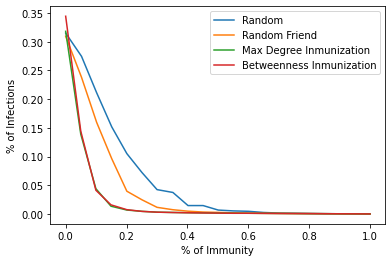

In [ ]:
REPETITIONS = 500
beta = 0.03
fraction_values = np.arange(0,1.05,0.05) # Valores de la fracción de inmunizados
x_values = [] # % de Inmunes Random
y_values = [] # % de Infectados Random
x_values_friends = [] # % de Inmunes Random Friend
y_values_friends = [] # % de Infectados Random Friend
x_values_max = [] # % de Inmunes Max Degree Inmunization
y_values_max = [] # % de Infectados Max Degree Inmunization
x_values_bet = [] # % de Inmunes Betweenness Inmunization
y_values_bet = [] # % de Infectados Betweenness Inmunization


for fraction in fraction_values: # Se itera por cada valor de fracción de inmunizados
  infect_avg,immunity_avg = simulate_multiple_independent_cascades_immunity(g, beta, REPETITIONS, give_immunity_random, fraction) # Se devuelven las medias para cada valor de fracción de inmunizados
  x_values.append(immunity_avg)
  y_values.append(infect_avg)

  infect_avg_friends,immunity_avg_friends = simulate_multiple_independent_cascades_immunity(g, beta, REPETITIONS, give_immunity_random_friend, fraction)
  x_values_friends.append(immunity_avg_friends)
  y_values_friends.append(infect_avg_friends)

  infect_avg_max,immunity_avg_max = simulate_multiple_independent_cascades_immunity(g, beta, REPETITIONS, targeted_immunization_degree, fraction)
  x_values_max.append(immunity_avg_max)
  y_values_max.append(infect_avg_max)

  infect_avg_bet,immunity_avg_bet = simulate_multiple_independent_cascades_immunity(g, beta, REPETITIONS, targeted_immunization_betweenness, fraction) # Se devuelven las medias para cada valor de fracción de inmunizados
  x_values_bet.append(immunity_avg_bet)
  y_values_bet.append(infect_avg_bet)

plt.plot(x_values, y_values, label = "Random")
plt.plot(x_values_friends, y_values_friends, label = "Random Friend")
plt.plot(x_values_max, y_values_max, label = "Max Degree Inmunization")
plt.plot(x_values_bet, y_values_bet, label = "Betweenness Inmunization")

plt.legend()
plt.xlabel("% of Immunity")
plt.ylabel("% of Infections")
plt.show()

En este gráfico, que compara el % de infectados con el % de inmunes, podemos observar que las últimas simulaciones son con diferencia las óptimas, el porcentaje de infecciones baja a 0 con solo un 20% de inmunizados, algo que los demás métodos hacen con el 40% y el 60% respectivamente, por lo que en situaciones en la que inmunidad se proporcione mediante algún recurso escaso o de difícil adquisición, podría ser, sin contar otras variables, el método idóneo para erradicar una infección en el menor tiempo o al menos con el mínimo uso de recursos. A su vez, se puede ver que dichos valores son invariables, ya que los nodos de mayor grado, al igual que los de mayor betweenness, siempre son los mismos, se repita el proceso el número de veces que sea, el resultado será igual a diferencia de los dos de Random, la única diferencia entre los dos de Targeted Immunization es que el de Betweennes es ligeramente más eficiente que el de max degree ya que este primero, se encarga de aislar "comunidades" evitando así que la propagación pase de una a otra.

Como se puede ver con la función adicional que he creado, siguiente apartado, con tan solo un 20% de inmunizados de los nodos de mayor grado, se evitan un 40% de la fuentes de infección del grafo, se puede ver más detalle en lo que se imprime en pantalla en la función print_infections_prevented el como afecta la inmunización de cada nodo.

In [ ]:
### CÓDIGO EXTRA PARA HACER PRUEBAS

def compute_total_infections_prevented(graph,fraction, beta, method, repetitions):
  expected_infections_in_graph = len(graph.edges())*2*beta # Todos los enlaces pueden suponer una infección tanto de un nodo como del otro por eso se multiplica por 2 y por beta para la expectation
  prevented_infections_avg = 0
  for i in range(repetitions):
    immunity = method(graph, fraction)
    total_infections = 0 # Posibles infecciones que hubiesen podido provocar dichos nodos es igual a su grado
    for node in immunity:
      if(immunity[node] == True):
        total_infections += graph.degree(node)
    prevented_infections_avg += (total_infections * beta)/(expected_infections_in_graph*repetitions) # Se normaliza para conseguir la media, si se multiplica por beta tenemos el número de infecciones estimadas
  return prevented_infections_avg



def print_infections_prevented(graph,fraction, beta, method):
  immunity = method(graph, fraction)
  total_infections_in_graph = len(graph.edges())*2 # Todos los enlaces pueden suponer una infección tanto de un nodo como del otro por eso se multiplica por 2
  total_infections = 0
  for node in immunity:
    if(immunity[node] == True):
      total_infections += graph.degree(node)
      print(("Node %s with degree %d has been immunized, it means that it prevented %d possible infections with an expectation of %d infections (Ro = Beta·k, beta = %.2f)")%(node,graph.degree(node),graph.degree(node),round(beta*graph.degree(node)),beta))
  print(("\n\nTOTAL\nTotal possible infections prevented: %d (over %d) \nTotal expected infections prevented: %d (over %d), %.2f percent ")%(total_infections, total_infections_in_graph, round(total_infections*beta),round(total_infections_in_graph*beta),total_infections/total_infections_in_graph*100))



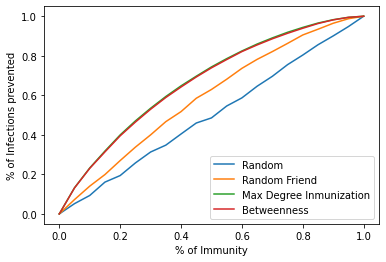

In [ ]:
# TARDA BASTANTE EN EJECUTAR, 5 MIN PARA 5 REPETICIONES, ESTO SE DEBE A QUE DEBE HACER DOS BUCLES GRANDES ENCADENADOS

beta = 0.03
REPETITIONS = 5
fraction_values = np.arange(0,1.05,0.05) # Valores de la fracción de inmunizados
x_values = fraction_values # % de Inmunes Random
y_values = [] # % of Infections prevented Random
x_values_friends = fraction_values # % de Inmunes Random Friend
y_values_friends = [] # % de Infectados Random Friend
x_values_max = fraction_values # % de Inmunes Max Degree Inmunization
y_values_max = [] # % of Infections prevented Max Degree Inmunization
x_values_bet = fraction_values # % de Inmunes Betweenness Inmunization
y_values_bet = [] # % of Infections prevented Betweenness Inmunization

for fraction in fraction_values: # Se itera por cada valor de fracción de inmunizados

  y_values.append(compute_total_infections_prevented(g,fraction, beta, give_immunity_random, REPETITIONS))

  y_values_friends.append(compute_total_infections_prevented(g,fraction, beta, give_immunity_random_friend, REPETITIONS))

  y_values_max.append(compute_total_infections_prevented(g,fraction, beta, targeted_immunization_degree, REPETITIONS))

  y_values_bet.append(compute_total_infections_prevented(g,fraction, beta, targeted_immunization_betweenness, REPETITIONS))

plt.plot(x_values, y_values, label = "Random")
plt.plot(x_values_friends, y_values_friends, label = "Random Friend")
plt.plot(x_values_max, y_values_max, label = "Max Degree Inmunization")
plt.plot(x_values_bet, y_values_bet, label = "Betweenness")

plt.legend()
plt.xlabel("% of Immunity")
plt.ylabel("% of Infections prevented")
plt.show()

In [ ]:
print_infections_prevented(g,0.2, beta, targeted_immunization_degree)

Node 1437 with degree 80 has been immunized, it means that it prevented 80 possible infections with an expectation of 2 infections (Ro = Beta·k, beta = 0.03)
Node 1441 with degree 158 has been immunized, it means that it prevented 158 possible infections with an expectation of 5 infections (Ro = Beta·k, beta = 0.03)
Node 1463 with degree 81 has been immunized, it means that it prevented 81 possible infections with an expectation of 2 infections (Ro = Beta·k, beta = 0.03)
Node 1495 with degree 81 has been immunized, it means that it prevented 81 possible infections with an expectation of 2 infections (Ro = Beta·k, beta = 0.03)
Node 1554 with degree 107 has been immunized, it means that it prevented 107 possible infections with an expectation of 3 infections (Ro = Beta·k, beta = 0.03)
Node 1598 with degree 106 has been immunized, it means that it prevented 106 possible infections with an expectation of 3 infections (Ro = Beta·k, beta = 0.03)
Node 1604 with degree 81 has been immunized, i

In [ ]:
print_infections_prevented(g,0.2, beta, give_immunity_random)

Node 1440 with degree 40 has been immunized, it means that it prevented 40 possible infections with an expectation of 1 infections (Ro = Beta·k, beta = 0.03)
Node 1554 with degree 107 has been immunized, it means that it prevented 107 possible infections with an expectation of 3 infections (Ro = Beta·k, beta = 0.03)
Node 1604 with degree 81 has been immunized, it means that it prevented 81 possible infections with an expectation of 2 infections (Ro = Beta·k, beta = 0.03)
Node 1678 with degree 122 has been immunized, it means that it prevented 122 possible infections with an expectation of 4 infections (Ro = Beta·k, beta = 0.03)
Node 1857 with degree 116 has been immunized, it means that it prevented 116 possible infections with an expectation of 3 infections (Ro = Beta·k, beta = 0.03)
Node 1433 with degree 38 has been immunized, it means that it prevented 38 possible infections with an expectation of 1 infections (Ro = Beta·k, beta = 0.03)
Node 1471 with degree 77 has been immunized, i

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>